In [28]:
import json
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials

In [5]:
with open("/Users/annadangela/Documents/Shh/spotify_token.json") as f:
    d = json.load(f)
    client_id = d['id']
    client_secret = d['secret']

In [6]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id='spotify:playlist:7MEqMmwJ35o0Ugg5Bm7Gup' 
results = sp.playlist(playlist_id)

In [15]:
# TODO - there's gotta be a better way!

# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [17]:
final_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,1QXiYUBKaibKVHEbxBeu1f,Veil of Counsel,Ecco,Public Memory,False,47,0.589,0.380,9,-9.833,...,0.900,0.3440,0.1800,89.982,audio_features,spotify:track:1QXiYUBKaibKVHEbxBeu1f,https://api.spotify.com/v1/tracks/1QXiYUBKaibK...,https://api.spotify.com/v1/audio-analysis/1QXi...,5.307233,4
1,0f3HpUeCzPHnOYKu0mPhjJ,Evigt Fiskande,Evigt Fiskande - Original Mix,PANG!,False,35,0.729,0.705,7,-10.458,...,0.703,0.0778,0.1010,121.986,audio_features,spotify:track:0f3HpUeCzPHnOYKu0mPhjJ,https://api.spotify.com/v1/tracks/0f3HpUeCzPHn...,https://api.spotify.com/v1/audio-analysis/0f3H...,8.000250,3
2,4e1TDCaLkn77JOgghYb11y,Solar,Swan Dive,Maceo Plex,False,34,0.716,0.554,6,-11.365,...,0.789,0.0450,0.1120,110.010,audio_features,spotify:track:4e1TDCaLkn77JOgghYb11y,https://api.spotify.com/v1/tracks/4e1TDCaLkn77...,https://api.spotify.com/v1/audio-analysis/4e1T...,9.250983,4
3,0mpvvju4F87swOqaC3pjAU,Solar,Polygon Pulse,"Maceo Plex, DNCN",False,33,0.706,0.638,4,-8.370,...,0.695,0.0951,0.4960,126.987,audio_features,spotify:track:0mpvvju4F87swOqaC3pjAU,https://api.spotify.com/v1/tracks/0mpvvju4F87s...,https://api.spotify.com/v1/audio-analysis/0mpv...,6.679850,4
4,5gCGQlfEofp2Zxz5ZjJAa9,W:/2016ALBUM/,Let Go,"deadmau5, Grabbitz",False,48,0.644,0.555,0,-10.981,...,0.309,0.1200,0.0345,128.026,audio_features,spotify:track:5gCGQlfEofp2Zxz5ZjJAa9,https://api.spotify.com/v1/tracks/5gCGQlfEofp2...,https://api.spotify.com/v1/audio-analysis/5gCG...,6.307500,3


In [18]:
final_df.columns

Index(['id', 'album', 'name', 'artist', 'explicit', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [20]:
features_df = final_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.589,0.380,9,-9.833,0,0.0272,0.08020,0.900,0.3440,0.1800,89.982,5.307233
1,0.729,0.705,7,-10.458,0,0.0294,0.11100,0.703,0.0778,0.1010,121.986,8.000250
2,0.716,0.554,6,-11.365,1,0.0345,0.00963,0.789,0.0450,0.1120,110.010,9.250983
3,0.706,0.638,4,-8.370,0,0.0312,0.23900,0.695,0.0951,0.4960,126.987,6.679850
4,0.644,0.555,0,-10.981,0,0.0429,0.20500,0.309,0.1200,0.0345,128.026,6.307500


In [21]:
features_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.660792,0.610667,5.854167,-9.191000,0.354167,0.045688,0.121326,0.461374,0.180285,0.339873,121.071583,5.293722
std,0.129377,0.130002,3.590707,2.526661,0.483321,0.020760,0.190602,0.340019,0.141392,0.231840,19.810672,1.667138
min,0.348000,0.322000,0.000000,-14.709000,0.000000,0.024800,0.000429,0.000000,0.045000,0.034500,74.999000,2.739583
25%,0.600500,0.516250,4.000000,-10.966750,0.000000,0.031350,0.006210,0.097825,0.095400,0.132500,110.996750,4.056000
50%,0.686500,0.583000,7.000000,-9.449500,0.000000,0.040200,0.039050,0.546000,0.118000,0.328000,119.998500,5.053833
75%,0.747750,0.709500,9.000000,-7.459000,1.000000,0.053100,0.137250,0.779750,0.217250,0.527250,127.246750,6.141579
max,0.920000,0.887000,11.000000,-3.801000,1.000000,0.132000,0.743000,0.932000,0.607000,0.838000,188.069000,9.411017


In [24]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features_df.loc[:]=min_max_scaler.fit_transform(features_df.loc[:])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


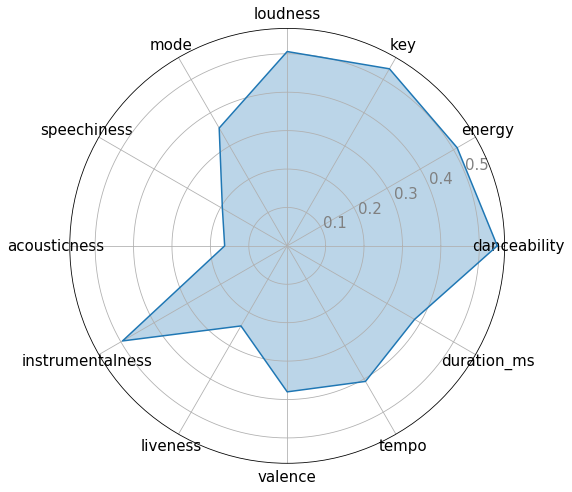

In [29]:
# TODO not mine

import matplotlib.pyplot as plt

# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(features_df.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(features_df.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*np.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()